# Titanic Survival Predictions

In [125]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
# Importing the dataset
train_data = pd.read_csv('titanic_train.csv')

In [127]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [129]:
# We see that the dataset contains some null value which needs to be sorted which will be done later. For now, lets visualize the data

### Data Visualization

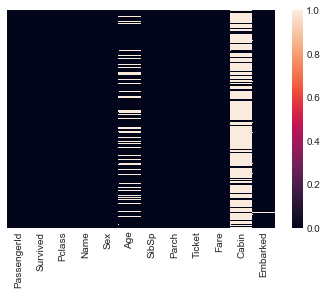

In [130]:
c1 = sns.color_palette("GnBu_d")
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = c1)

The above plot reconfirms that there are null values in the dataset, especially in age and cabin column

Since passengerid and ticket is of no significance, so we will drop it

In [131]:
train_data.drop(['PassengerId','Ticket'], axis = 1, inplace = True, errors = 'ignore') 

In [132]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


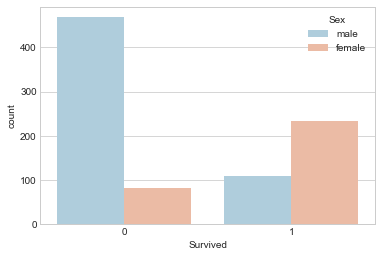

In [133]:
# Now checking the survivors in male and female categories
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Sex', data=train_data, palette='RdBu_r')

More no of female passengers have survived wrt to male

In [134]:
# Encoding the Sex so as to use it as a feature to train with
from sklearn.preprocessing import LabelEncoder
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

In [135]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,NaN,C


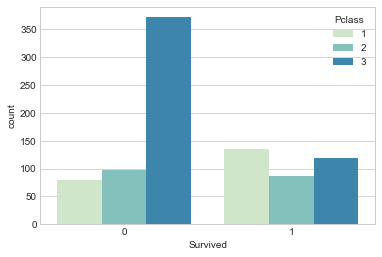

In [136]:
# Now checking which class of passengers have survived the most
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Pclass', data=train_data, palette='GnBu')

So we can see that more no. of passengers of first class have survived while the third class passengers have been worst affected in terms of ratio of survival in respective categories.

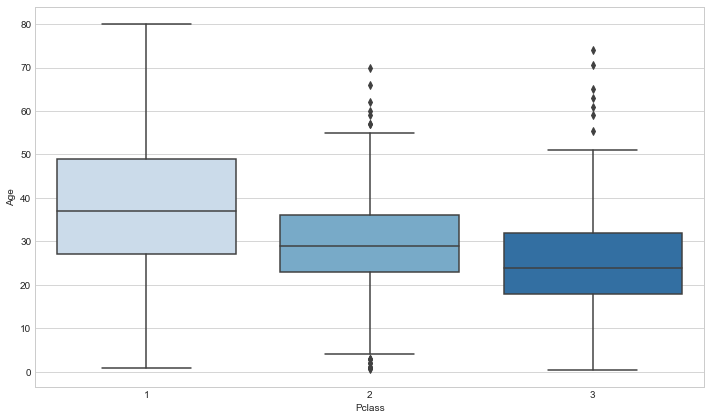

In [137]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='Blues')

So we can see that the average age of 1st, 2nd and 3rd class passengers are approx. 37, 29 and 24 resp.
So we will use this data to fill the null age values

In [138]:
def apply_age(x):
    Age = x[0]
    Pclass = x[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

In [139]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(apply_age, axis = 1)
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,24.0,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,NaN,C


In [140]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


So we have filled the null Age value

In [141]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [142]:
# Lets fill the null values by a unique letter Z
train_data['Cabin'].fillna('Z', inplace = True)
train_data['Cabin'].unique()

array(['Z', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [143]:
# Now we require just the letters of the Cabin data
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: x[0])

In [144]:
train_data['Cabin'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [145]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,Z,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,Z,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,Z,S
5,0,3,"Moran, Mr. James",1,24.0,0,0,8.4583,Z,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,E,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,Z,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,Z,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,Z,C


We have cleaned up almost the complete dataset. But if we see the name column, we can see the salutation succeeding the comma and preceeding the dot. This enables us to extract these salutations and use them for training purpose

In [146]:
train_data['Name'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
train_data['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [147]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,7.2500,Z,S
1,1,1,Mrs,0,38.0,1,0,71.2833,C,C
2,1,3,Miss,0,26.0,0,0,7.9250,Z,S
3,1,1,Mrs,0,35.0,1,0,53.1000,C,S
4,0,3,Mr,1,35.0,0,0,8.0500,Z,S
5,0,3,Mr,1,24.0,0,0,8.4583,Z,Q
6,0,1,Mr,1,54.0,0,0,51.8625,E,S
7,0,3,Master,1,2.0,3,1,21.0750,Z,S
8,1,3,Mrs,0,27.0,0,2,11.1333,Z,S
9,1,2,Mrs,0,14.0,1,0,30.0708,Z,C


In [148]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


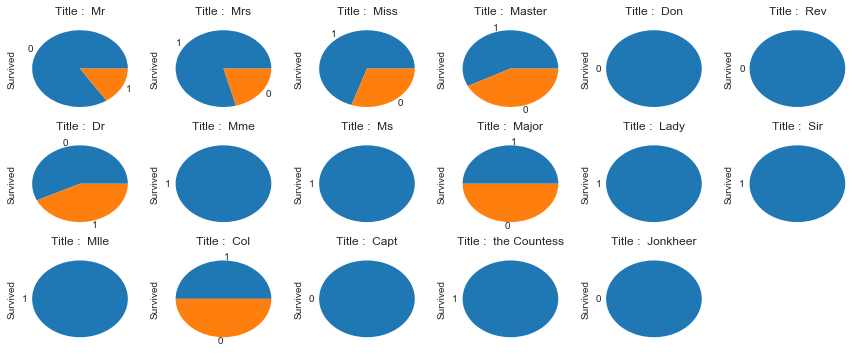

In [149]:
fig = plt.figure(figsize=(15,6))

i=1
for title in train_data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train_data.Survived[train_data['Name'] == title].value_counts().plot(kind='pie')
    i += 1

In [150]:
replacement = {
    ' Don' : 0,
    ' Rev' : 0,
    ' Jonkheer' : 0,
    ' Capt' : 0,
    ' Mr' : 1,
    ' Dr' : 2,
    ' Col' : 3,
    ' Major' : 3,
    ' Master' : 4,
    ' Miss' : 5,
    ' Mrs' : 6,
    ' Mme' : 7,
    ' Ms' : 7,
    ' Mlle' : 7,
    ' Sir' : 7,
    ' Lady' : 7,
    ' the Countess' : 7
}

train_data['Name'] = train_data['Name'].apply(lambda x: replacement.get(x))

from sklearn.preprocessing import StandardScaler
train_data['Name'] = StandardScaler().fit_transform(train_data['Name'].values.reshape(-1, 1))

C:\Users\dalai\Anaconda3\envs\txt_summ\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dalai\Anaconda3\envs\txt_summ\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


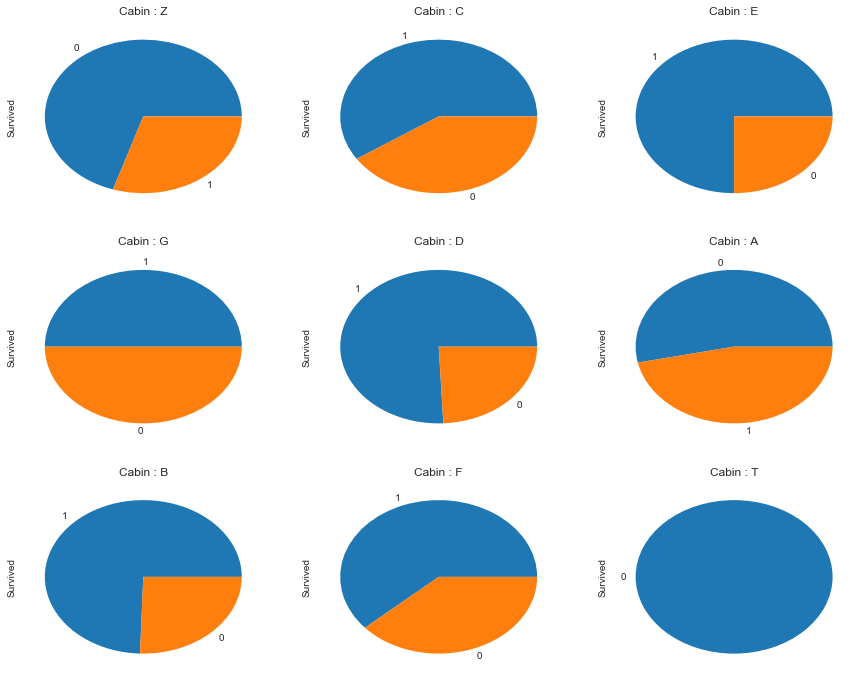

In [151]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in train_data['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    train_data.Survived[train_data['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [152]:
replacement = {
    'T': 0,
    'Z': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

train_data['Cabin'] = train_data['Cabin'].apply(lambda x: replacement.get(x))
train_data['Cabin'] = StandardScaler().fit_transform(train_data['Cabin'].values.reshape(-1, 1))

C:\Users\dalai\Anaconda3\envs\txt_summ\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dalai\Anaconda3\envs\txt_summ\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [121]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,-0.797294,1,22.0,1,0,7.2500,-0.494813,S
1,1,1,1.537975,0,38.0,1,0,71.2833,0.960231,C
2,1,3,1.070922,0,26.0,0,0,7.9250,-0.494813,S
3,1,1,1.537975,0,35.0,1,0,53.1000,0.960231,S
4,0,3,-0.797294,1,35.0,0,0,8.0500,-0.494813,S
5,0,3,-0.797294,1,24.0,0,0,8.4583,-0.494813,Q
6,0,1,-0.797294,1,54.0,0,0,51.8625,2.415274,S
7,0,3,0.603868,1,2.0,3,1,21.0750,-0.494813,S
8,1,3,1.537975,0,27.0,0,2,11.1333,-0.494813,S
9,1,2,1.537975,0,14.0,1,0,30.0708,-0.494813,C


In [154]:
embark = pd.get_dummies(train_data['Embarked'], drop_first = True)

In [155]:
train_data = pd.concat([train_data, embark],axis=1)

In [156]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Q,S
0,0,3,-0.797294,1,22.0,1,0,7.2500,-0.494813,S,0,1
1,1,1,1.537975,0,38.0,1,0,71.2833,0.960231,C,0,0
2,1,3,1.070922,0,26.0,0,0,7.9250,-0.494813,S,0,1
3,1,1,1.537975,0,35.0,1,0,53.1000,0.960231,S,0,1
4,0,3,-0.797294,1,35.0,0,0,8.0500,-0.494813,S,0,1
5,0,3,-0.797294,1,24.0,0,0,8.4583,-0.494813,Q,1,0
6,0,1,-0.797294,1,54.0,0,0,51.8625,2.415274,S,0,1
7,0,3,0.603868,1,2.0,3,1,21.0750,-0.494813,S,0,1
8,1,3,1.537975,0,27.0,0,2,11.1333,-0.494813,S,0,1
9,1,2,1.537975,0,14.0,1,0,30.0708,-0.494813,C,0,0


In [157]:
train_data.drop('Embarked', axis = 1, inplace = True)

In [158]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,0,3,-0.797294,1,22.0,1,0,7.2500,-0.494813,0,1
1,1,1,1.537975,0,38.0,1,0,71.2833,0.960231,0,0
2,1,3,1.070922,0,26.0,0,0,7.9250,-0.494813,0,1
3,1,1,1.537975,0,35.0,1,0,53.1000,0.960231,0,1
4,0,3,-0.797294,1,35.0,0,0,8.0500,-0.494813,0,1
5,0,3,-0.797294,1,24.0,0,0,8.4583,-0.494813,1,0
6,0,1,-0.797294,1,54.0,0,0,51.8625,2.415274,0,1
7,0,3,0.603868,1,2.0,3,1,21.0750,-0.494813,0,1
8,1,3,1.537975,0,27.0,0,2,11.1333,-0.494813,0,1
9,1,2,1.537975,0,14.0,1,0,30.0708,-0.494813,0,0


In [159]:
train_data.drop(['Age', 'Fare'], axis = 1, inplace = True)

In [160]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null float64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Cabin       891 non-null float64
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.5 KB


In [161]:
train_data.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Q,S
0,0,3,-0.797294,1,1,0,-0.494813,0,1
1,1,1,1.537975,0,1,0,0.960231,0,0
2,1,3,1.070922,0,0,0,-0.494813,0,1
3,1,1,1.537975,0,1,0,0.960231,0,1
4,0,3,-0.797294,1,0,0,-0.494813,0,1
5,0,3,-0.797294,1,0,0,-0.494813,1,0
6,0,1,-0.797294,1,0,0,2.415274,0,1
7,0,3,0.603868,1,3,1,-0.494813,0,1
8,1,3,1.537975,0,0,2,-0.494813,0,1
9,1,2,1.537975,0,1,0,-0.494813,0,0


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived',axis=1), 
                                                    train_data['Survived'], test_size=0.30, 
                                                    random_state=42)

In [163]:
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [164]:
predictions = svcmodel.predict(X_test)

In [165]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       157
          1       0.82      0.75      0.78       111

avg / total       0.83      0.83      0.83       268

[[139  18]
 [ 28  83]]


In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
predictions_log = logmodel.predict(X_test)

In [169]:
print(classification_report(y_test,predictions_log))
print(confusion_matrix(y_test,predictions_log))

             precision    recall  f1-score   support

          0       0.84      0.83      0.84       157
          1       0.76      0.78      0.77       111

avg / total       0.81      0.81      0.81       268

[[130  27]
 [ 24  87]]


In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rfc = RandomForestClassifier(n_estimators=600)

In [172]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [173]:
predictions = rfc.predict(X_test)

In [174]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.87      0.83       157
          1       0.79      0.70      0.74       111

avg / total       0.80      0.80      0.80       268

[[136  21]
 [ 33  78]]
